# Analisis exploratorio de los datos


## Sección de descarga y lectura de datos 

In [ ]:
# librerias Necesarias
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
!pip install -q kaggle

EL dataset que se esta utilizando es de Accidentes de trafico de Estados Unidos del año 2016 al 2020, se puede consultar informacion del dataset en los siguientes enlances:

*   https://www.kaggle.com/sobhanmoosavi/us-accidents
*   https://smoosavi.org/datasets/us_accidents 



In [ ]:
#API de kaggle para descargar el dataset
import os
os.environ['KAGGLE_USERNAME'] ="sergiomr04" # username 
os.environ['KAGGLE_KEY'] = "7400f9c2913e5b4b8a17ab2661f963b6" # key 
!kaggle datasets download -d sobhanmoosavi/us-accidents # api copied from kaggle

 92% 268M/290M [00:06<00:01, 20.5MB/s]
100% 290M/290M [00:06<00:00, 48.0MB/s]


In [ ]:
#descomprimimos los datos descargados y eliminamos el arcivo ZIP 
#si pregunta si quieremos remplazar el archivo debemos escribir "yes"
!unzip -q us-accidents.zip -d .
os.remove("/content/us-accidents.zip")

In [ ]:
#Realizamos la Lectura de los datos
accidentes = pd.read_csv("/content/US_Accidents_Dec20_Updated.csv",index_col=0)

Una vez cargados los datos, podemos observar las columnas de las cuales esta compuesto. Para una informacion mas especifica acerca de las columnas, se pede consultar el diccionario de datos, ya sea en la carpeta de este repositorio, o en el siguiente enlace.
* https://www.kaggle.com/sobhanmoosavi/us-accidents 

In [ ]:
accidentes.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

De igual manera exploramos un poco los datos para saber el tipo de datos que hay en cada columna y si existen NaNs en los datos.

In [ ]:
accidentes.isna().sum(axis=0)

Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity                        0
Bump      

In [ ]:
accidentes.dtypes

Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [ ]:
accidentes

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


Como se puede observar el Dataset esta compuesto de varios tipos de datos, en general los tipo object se refieren a datos categoricos mayormente, a excepcion de Description, la cual contiene una descripcion en texto acerca del accidente.





## Gráficas

Para empezar a analizar los datos, se observa se distribuyen los accidentes a lo largo de Estados Unidos

In [ ]:
#calculo de accidentes por estado
estados_acci = accidentes.groupby('State')['State'].count()
estados=estados_acci.rename("count").reset_index()


In [ ]:
!pip install geopandas
import geopandas
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

     |████████████████████████████████| 1.0MB 11.6MB/s 
     |████████████████████████████████| 6.6MB 26.2MB/s 
     |████████████████████████████████| 15.4MB 190kB/s 


In [ ]:
nil=geopandas.read_file(state_geo)
nil.head()

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [ ]:
nil.rename(columns={'id':'State'}, inplace=True)

In [ ]:
mun_mapping = nil.merge(estados, on='State')
mun_mapping["percent"]=round(mun_mapping['count']/mun_mapping['count'].sum()*100,2)
#mun_mapping


In [ ]:
x_map=nil.centroid.x.mean()
y_map=nil.centroid.y.mean()
print(x_map,y_map)

-93.8092064016807 39.62510389893046


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [ ]:
import folium
mymap = folium.Map(location=[y_map, x_map], zoom_start=5,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)

mymap.choropleth(
 geo_data=mun_mapping,
 name='Choropleth',
 data=mun_mapping,
 columns=['State','count'],
 key_on="feature.properties.State",
 fill_color='YlGnBu',
 fill_opacity=1,
 line_opacity=1,
 legend_name='Numero de Accidentes',
 smooth_factor=0
)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    mun_mapping,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name','percent'],
        aliases=['Estado: ','Numero de accidentes totales en %: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
mymap.add_child(NIL)
mymap.keep_in_front(NIL)
folium.LayerControl().add_to(mymap)
mymap


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning



Debido a la gran catidad de datos se decide establecer solo el estado con mayor numero de accidentes, siendo California, con un total de 730744 accidentes reportados.


In [ ]:
estados_acci.sort_values(ascending=False).head()

State
CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
Name: State, dtype: int64


Se realiza el cambio en el tipo de variables de cada dato y se obtiene informacion  de interés de la fecha del accidente




In [ ]:
acc_CA = accidentes[accidentes['State']=='CA'].reset_index(drop=True)
acc_CA['Start_Time'] = pd.to_datetime(acc_CA['Start_Time'])
acc_CA['End_Time'] = pd.to_datetime(acc_CA['End_Time'])
acc_CA['Year'] = acc_CA['Start_Time'].dt.year
acc_CA['Month'] = acc_CA['Start_Time'].dt.month
acc_CA['Day'] = acc_CA['Start_Time'].dt.day
acc_CA['Hour'] = acc_CA['Start_Time'].dt.hour
tiempo =(acc_CA['End_Time']-acc_CA['Start_Time'])
acc_CA['minutos'] = pd.Series(list(map(lambda dif: dif.days*24*60 + round(dif.seconds/60),tiempo)))
acc_CA['Weekday'] = pd.Series(list(map(date.isoweekday,acc_CA['Start_Time'])))

Se trabaja con los datos para clasificarlos por condado y nivel de severidad del accidente. 

Se observo que una gran parte de los accidentes ocurren en el condado de los Angeles y la mayoria de estos en todos los condados son clasificados con una severidad de 2, siendo la categoria más gran la se severidad 3.

In [ ]:
condados_accidentes = acc_CA.groupby(['County','Severity'])['County'].count().unstack(1)
condados_accidentes = condados_accidentes.fillna(0)
condados_accidentes['Total'] = condados_accidentes.sum(axis=1)
condados_accidentes = condados_accidentes.sort_values('Total',ascending=False)
condados_accidentes_top = condados_accidentes.head(16)

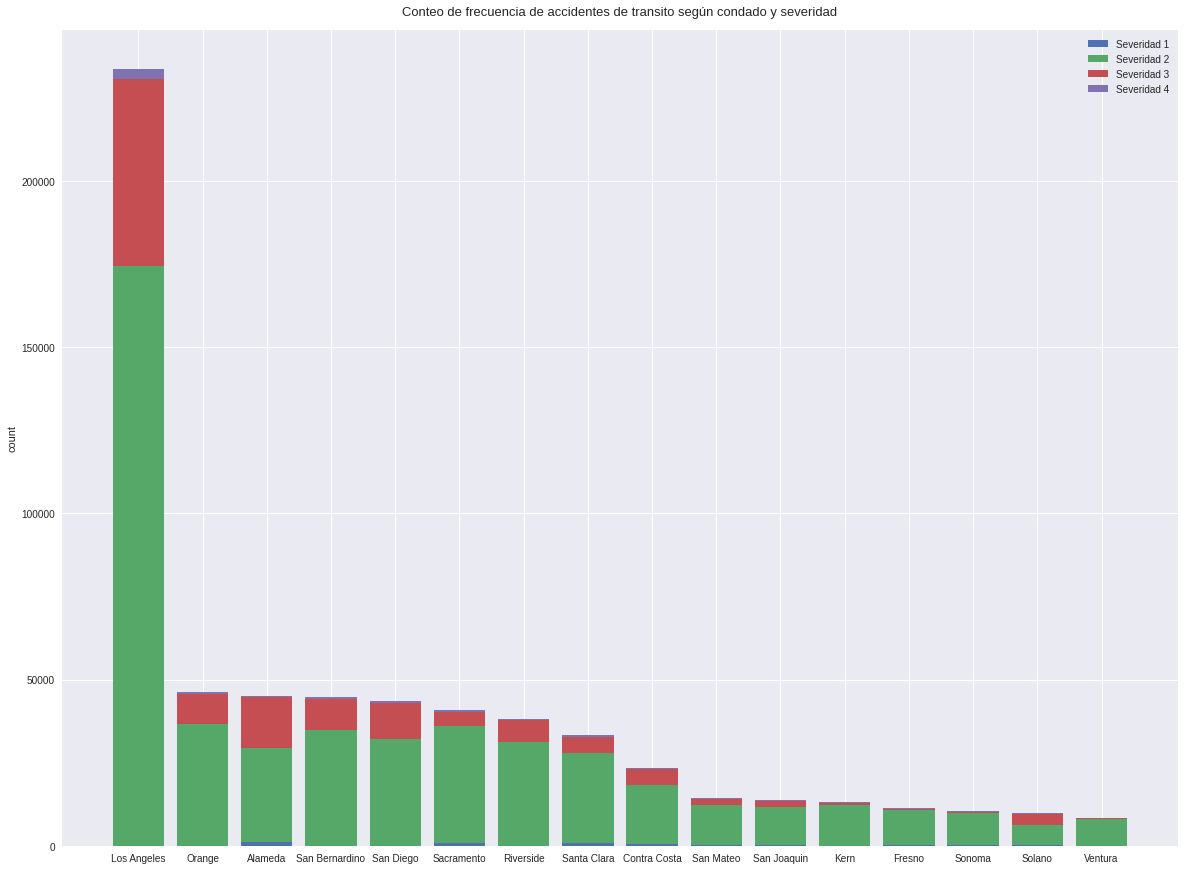

In [ ]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot()
plt1 = ax.bar(condados_accidentes_top.index, condados_accidentes_top[1], label='1')
plt2 = ax.bar(condados_accidentes_top.index, condados_accidentes_top[2], bottom=condados_accidentes_top[1])
plt3 = ax.bar(condados_accidentes_top.index, condados_accidentes_top[3], bottom=condados_accidentes_top[1]+condados_accidentes_top[2])
plt4 = ax.bar(condados_accidentes_top.index, condados_accidentes_top[4], bottom=condados_accidentes_top[1]+condados_accidentes_top[2]+condados_accidentes_top[3])

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de accidentes de transito según condado y severidad', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0],plt3[0],plt4[0]), ('Severidad 1', 'Severidad 2','Severidad 3','Severidad 4'));

Se realiza el análisis de los accidentes en funcion de los meses y años registrados, se observo que de 2016 a 2018 la tendencia de los accidentes se mantenian de forma estable, sin embargo, a partir de año 2019 fue a la alza y se manitiene en el año 2020.

In [ ]:
anios_accidentes = acc_CA.groupby(['Month','Year'])['Year'].count().unstack(1)
anios_accidentes = anios_accidentes.fillna(0)
for anio in range(2016,2021):
  anios_accidentes[f'{anio}percent'] = anios_accidentes[anio]/anios_accidentes[anio].max()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

[Text(0, 0.5, 'Número de accidentes'), Text(0.5, 0, 'Mes')]

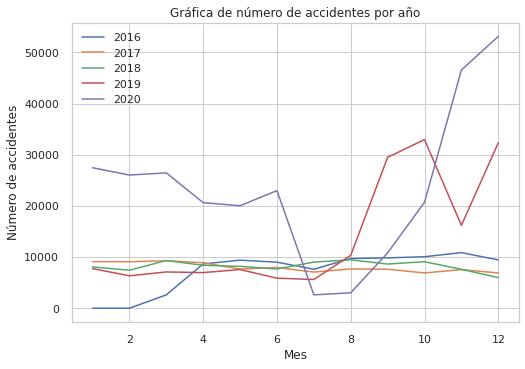

In [ ]:
sns.set(style='whitegrid')
ax = sns.lineplot(anios_accidentes.index,anios_accidentes[2016],label='2016');
for anio in range(2017,2021):
  sns.lineplot(anios_accidentes.index,anios_accidentes[anio],ax=ax,label=str(anio));
ax.legend(loc = 'upper left')

ax.set_title('Gráfica de número de accidentes por año')
ax.set(xlabel='Mes',ylabel='Número de accidentes')

Se normalizaron los datos de accidentes a lo largo del tiempo y se obtuvo que los maximos registros de accidentes se concentran en el último cuatrimestre de cada año.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

[Text(0, 0.5, 'Accidentes'), Text(0.5, 0, 'Mes')]

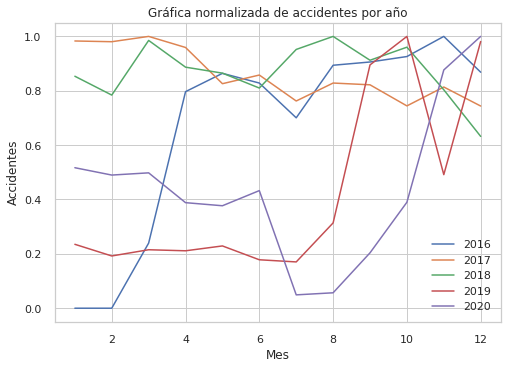

In [ ]:
ax = sns.lineplot(anios_accidentes.index,anios_accidentes['2016percent'],label='2016')

for anio in range(2017,2021):
  sns.lineplot(anios_accidentes.index,anios_accidentes[f'{anio}percent'],ax=ax,label=f'{anio}')
ax.legend(loc = 'lower right')

ax.set_title('Gráfica normalizada de accidentes por año')
ax.set(xlabel='Mes',ylabel='Accidentes')

Se analizó la condidición del clima en función del numero de accidentes, encontrado que la condición con mayor número de accidentes es "Fair" siendo que el clima esta despejado, siendo la siguiente condición con mayor número de accidentes "clear".

In [ ]:
clima_accidentes = acc_CA.groupby(['Weather_Condition','Severity'])['Weather_Condition'].count().unstack(1)
clima_accidentes = clima_accidentes.fillna(0)
clima_accidentes['Total'] = clima_accidentes.sum(axis=1)
clima_accidentes = clima_accidentes.sort_values('Total',ascending=False)
clima_accidentes_top = clima_accidentes.head(16)

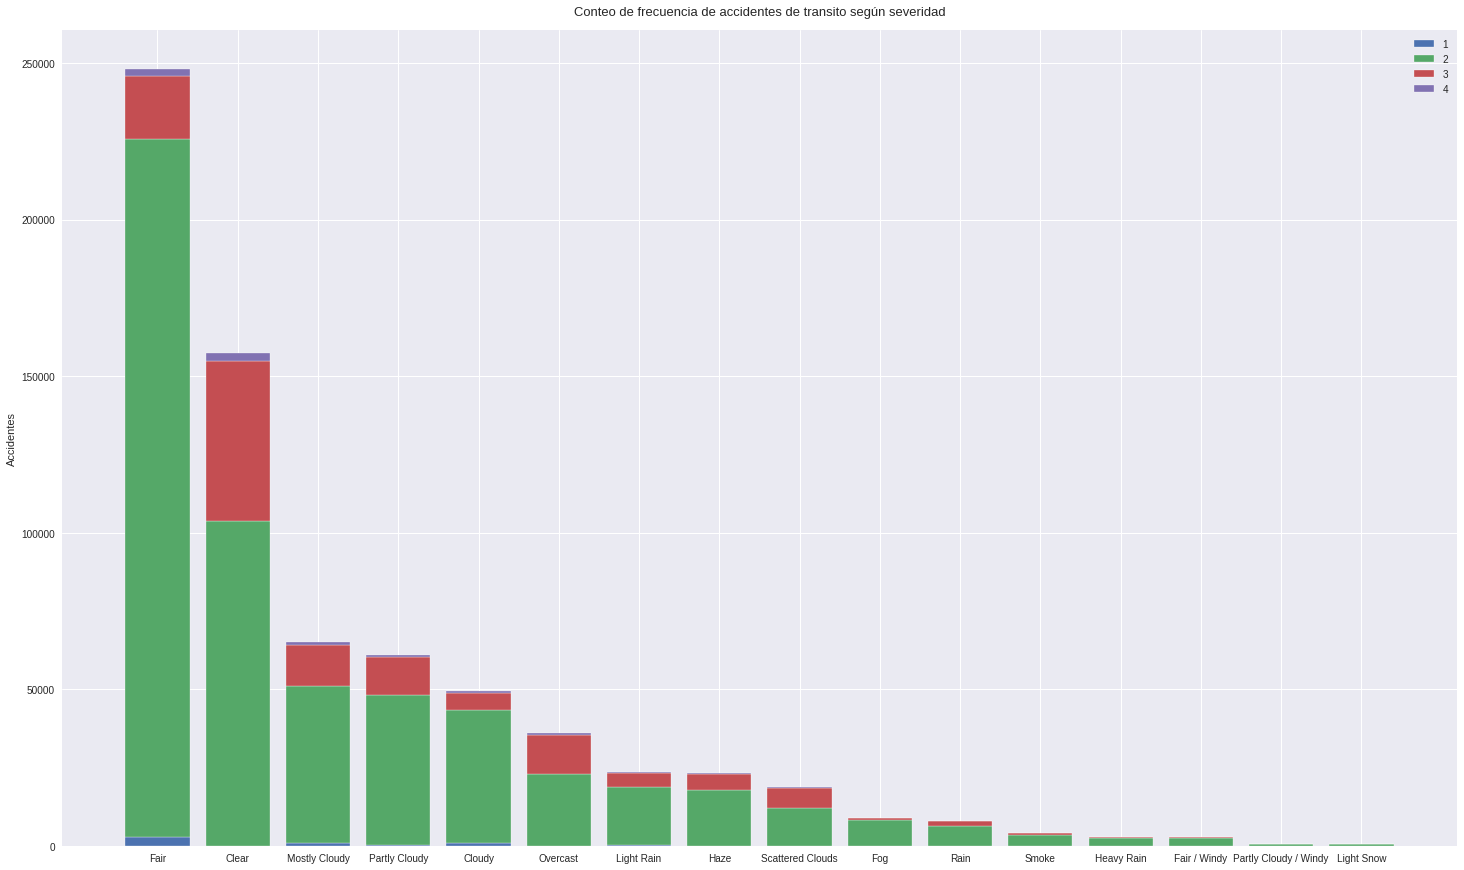

In [ ]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot()
plt1 = ax.bar(clima_accidentes_top.index, clima_accidentes_top[1], label='1')
plt2 = ax.bar(clima_accidentes_top.index, clima_accidentes_top[2], bottom=clima_accidentes_top[1])
plt3 = ax.bar(clima_accidentes_top.index, clima_accidentes_top[3], bottom=clima_accidentes_top[1]+clima_accidentes_top[2])
plt4 = ax.bar(clima_accidentes_top.index, clima_accidentes_top[4], bottom=clima_accidentes_top[1]+clima_accidentes_top[2]+clima_accidentes_top[3])

ax.set_ylabel('Accidentes')
ax.set_title('Conteo de frecuencia de accidentes de transito según severidad', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0],plt3[0],plt4[0]), ('1', '2','3','4'));

Se analizó la duración de los accidentes en función de la severidad y se encontró que los accidentes con una severidad de 4 son lo que más tiempo toman para disminuir el impacto en el trafico, meintras que la severidad 3 es relativamente menor tomando en cuanta la severidad 2 y por último los accidentes clasificados como 1 se observa que el tiempo de atención es mucho menor respecto a las demas clasificaciones. 

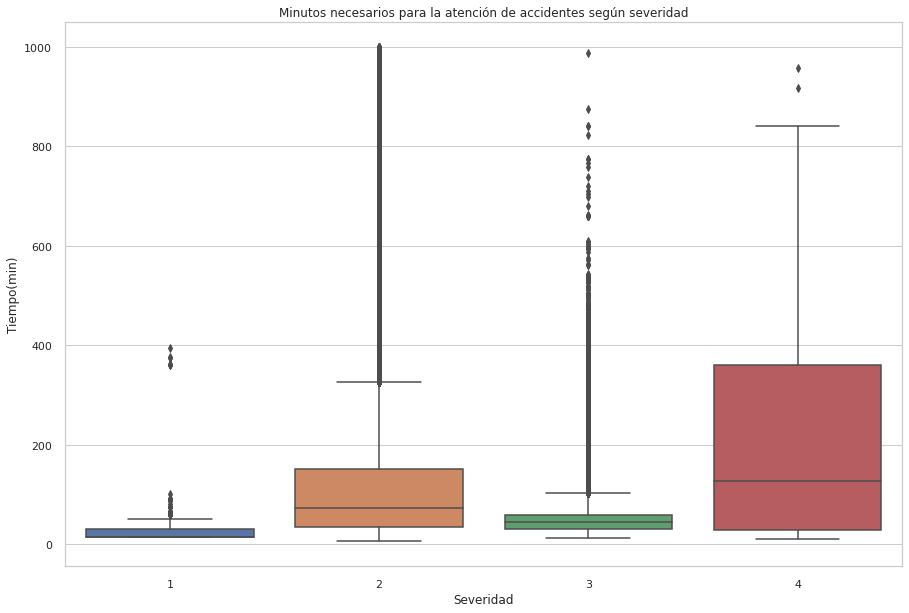

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=acc_CA[acc_CA['minutos']<=1000], x='Severity', y='minutos');
ax.set_title('Minutos necesarios para la atención de accidentes según severidad')
ax.set(xlabel='Severidad',ylabel='Tiempo(min)');

In [ ]:
acc_CA.groupby("Severity")[["Distance(mi)"]].agg(np.nanmean)

,Distance(mi)
Severity,
1,0.010531
2,0.220871
3,0.129046
4,0.993930


Se realizó en análisis de los accidentes en función de los puntos de interés y los halazgos relevalan que la gran mayoria de los accidentes a los largo de los años han occurido cerca en entroques sequida por la presencia de señales de tráfico.

In [ ]:
Anotation_colums=["Amenity","Bump","Crossing","Give_Way","Junction", "No_Exit",	"Railway",	"Roundabout", "Station", "Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]
columns_filter=[i for i in list(acc_CA.columns) if i not in Anotation_colums]

In [ ]:
acc_CA_ano=acc_CA.melt(id_vars=columns_filter,var_name="Punto_interes",value_name="Num_acc")
#acc_CA_ano["Num_acc"=="True"]

In [ ]:
acc_CA_ano=acc_CA_ano.groupby(["Year","Punto_interes"])[["Num_acc"]].sum()
acc_CA_ano=acc_CA_ano["Num_acc"].to_frame().reset_index()

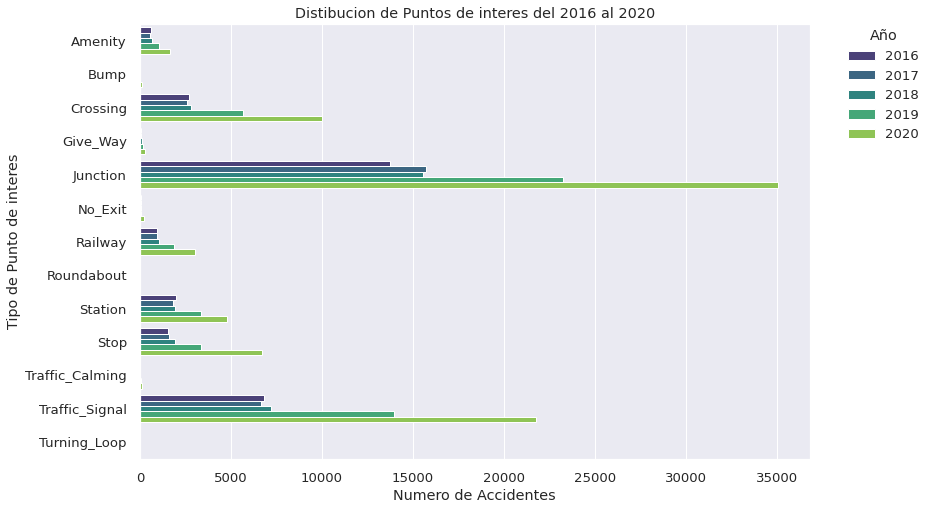

In [ ]:
plt.style.use('ggplot')
sns.set(font_scale=1.2)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
sns.barplot(x="Num_acc",y="Punto_interes", ax=ax, palette='viridis',hue="Year",data=acc_CA_ano);
ax.set_ylabel('Tipo de Punto de interes')
ax.set_xlabel('Numero de Accidentes')
ax.set_title('Distibucion de Puntos de interes del 2016 al 2020')
plt.legend(title="Año",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


In [ ]:
del acc_CA_ano

Se analizaron las clasificaciones de accidentes a lo largo de california y se logro determinar que la seviridad de 1 se concentra en 2 puntos del estado siendo las partes centro y sur donde se ubican la mayoria de estos, mientras que las demas estan a lo largo de todo el estado siedo la severidad 2 la mas concentrada.

In [ ]:
clase1 = acc_CA[acc_CA["Severity"]==1]
clase2 = acc_CA[acc_CA["Severity"]==2]
clase3 = acc_CA[acc_CA["Severity"]==3]
clase4 = acc_CA[acc_CA["Severity"]==4]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

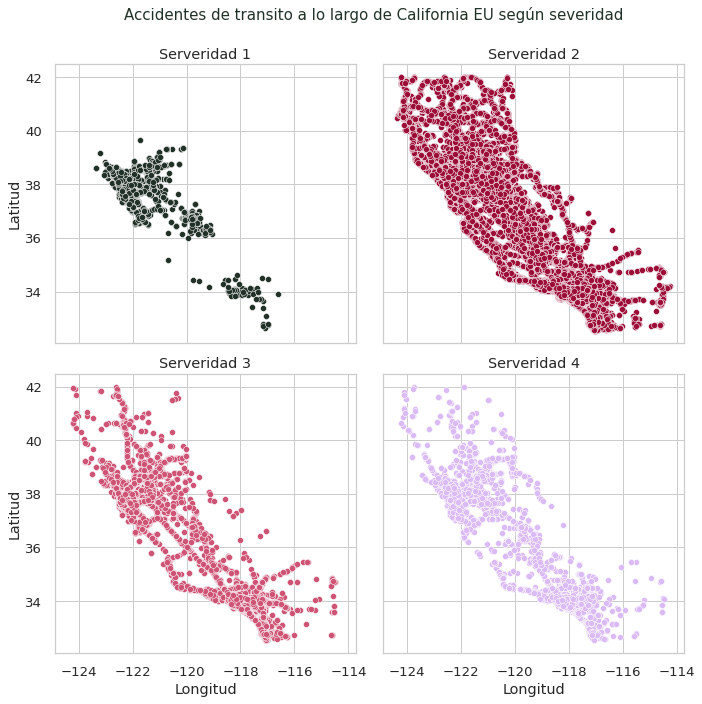

In [ ]:
sns.set_style('whitegrid')
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5"]

fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(2, 2, sharex=True, sharey=True)

sns.scatterplot(clase1['Start_Lng'], clase1['Start_Lat'], ax=axes[0, 0], color=palette[0])
sns.scatterplot(clase2['Start_Lng'], clase2['Start_Lat'], ax=axes[0, 1], color=palette[1])
sns.scatterplot(clase3['Start_Lng'], clase3['Start_Lat'], ax=axes[1, 0], color=palette[2])
sns.scatterplot(clase4['Start_Lng'], clase4['Start_Lat'], ax=axes[1, 1], color=palette[3]);

axes[0, 0].set_title('Serveridad 1')
axes[0, 1].set_title('Serveridad 2')
axes[1, 0].set_title('Serveridad 3')
axes[1, 1].set_title('Serveridad 4')

fig.suptitle('Accidentes de transito a lo largo de California EU según severidad', fontsize=15, c=palette[0], x=0.53)

axes[0, 0].set(ylabel = 'Latitud')
axes[1, 0].set(ylabel = 'Latitud')
axes[1, 0].set(xlabel = 'Longitud')
axes[1, 1].set(xlabel = 'Longitud')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

Por último, se realizó el análisis de los dias de la semana y las horas de cada dia en función de los accidentes y se encontro que entre semana hay registrados un mayor numero de accidentes siendo que de 3 pm a 6 pm donde se concentra el mayor número, mientras que en fin de semana el intervalo donde hay mayor número en de 1 pm a 2 pm.

In [ ]:
dias_accidentes = pd.crosstab(acc_CA['Weekday'],acc_CA['Hour'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

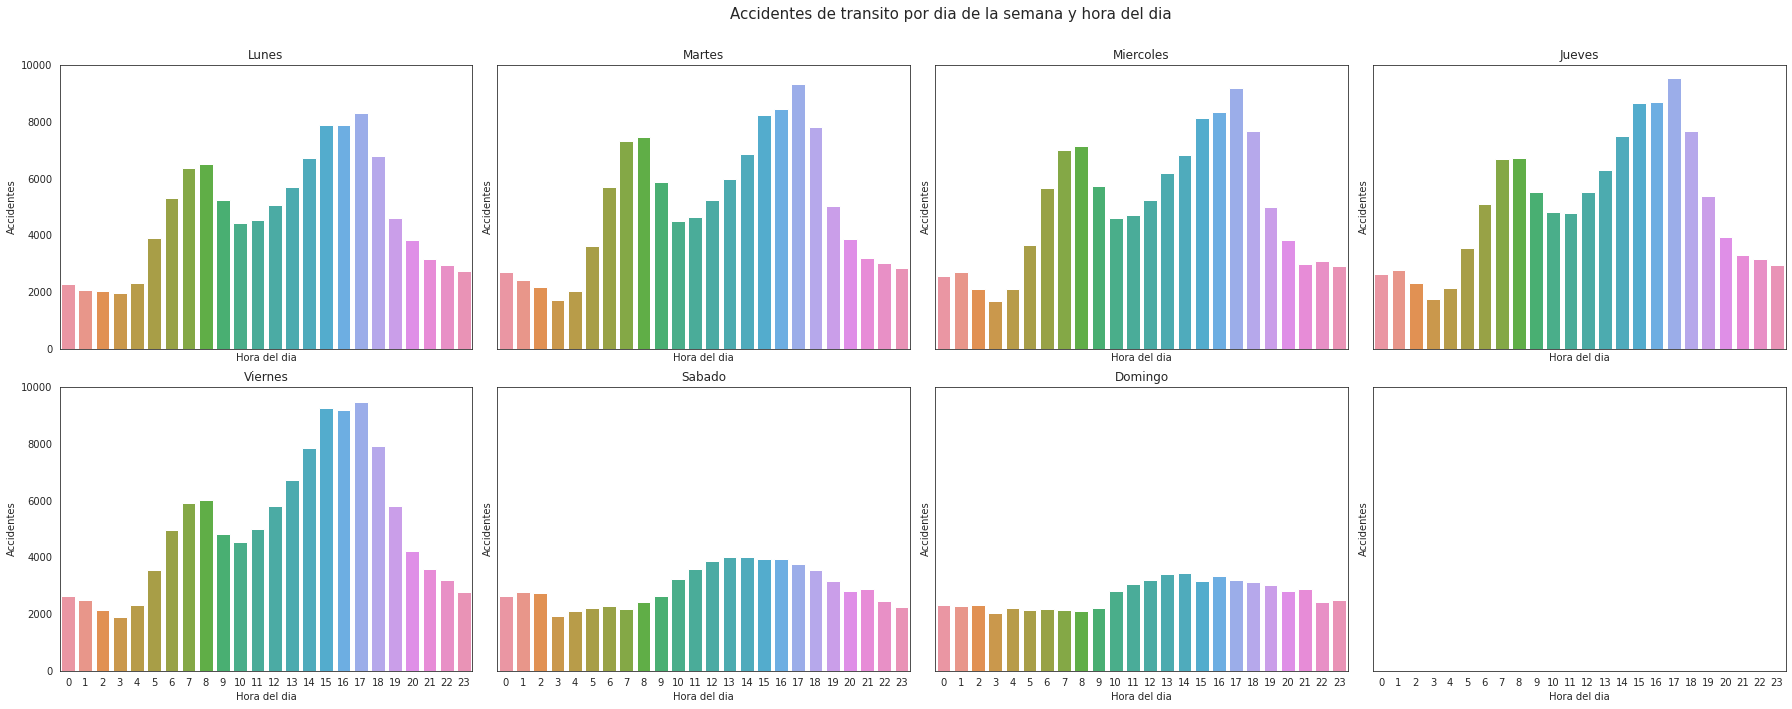

In [ ]:
sns.set_style('white')

fig = plt.figure(figsize=(25, 10))
axes = fig.subplots(2, 4, sharex=True, sharey=True)

sns.barplot(dias_accidentes.columns, dias_accidentes.loc[1], ax=axes[0, 0],)
sns.barplot(dias_accidentes.columns, dias_accidentes.loc[2], ax=axes[0, 1])
sns.barplot(dias_accidentes.columns, dias_accidentes.loc[3], ax=axes[0, 2])
sns.barplot(dias_accidentes.columns, dias_accidentes.loc[4], ax=axes[0, 3]);
sns.barplot(dias_accidentes.columns, dias_accidentes.loc[5], ax=axes[1, 0]);
sns.barplot(dias_accidentes.columns, dias_accidentes.loc[6], ax=axes[1, 1]);
sns.barplot(dias_accidentes.columns, dias_accidentes.loc[7], ax=axes[1, 2]);

axes[0, 0].set_title('Lunes')
axes[0, 1].set_title('Martes')
axes[0, 2].set_title('Miercoles')
axes[0, 3].set_title('Jueves')
axes[1, 0].set_title('Viernes')
axes[1, 1].set_title('Sabado')
axes[1, 2].set_title('Domingo')

for i in range(0,2):
  for j in range(0,4):
      axes[i, j].set(xlabel ='Hora del dia', ylabel = 'Accidentes')

fig.suptitle('Accidentes de transito por dia de la semana y hora del dia', fontsize=15, x=0.53)


plt.tight_layout()
plt.subplots_adjust(top=0.9)